In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


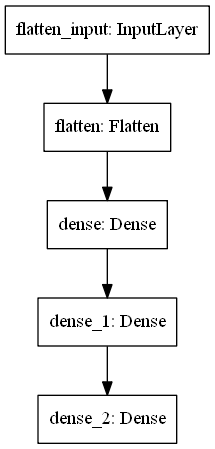

In [8]:
import pydot
keras.utils.plot_model(model)

In [9]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

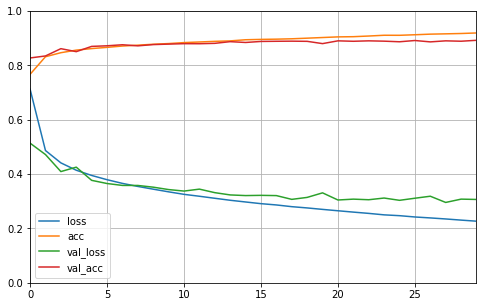

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.2228 - acc: 0.9200 - val_loss: 0.2932 - val_acc: 0.8918
Epoch 2/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2194 - acc: 0.9217 - val_loss: 0.2972 - val_acc: 0.8980
Epoch 3/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.2164 - acc: 0.9229 - val_loss: 0.2891 - val_acc: 0.8970
Epoch 4/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.2123 - acc: 0.9236 - val_loss: 0.2989 - val_acc: 0.8926
Epoch 5/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.2084 - acc: 0.9262 - val_loss: 0.2835 - val_acc: 0.8990
Epoch 6/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.2063 - acc: 0.9271 - val_loss: 0.2945 - val_acc: 0.8964
Epoch 7/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.2029 - acc: 0.9275 - val_loss: 0.2

In [25]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 83.7303 - acc: 0.8443


[83.73031523986329, 0.8443]

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)